# 주성분 분석(PCA) - Wine 데이터

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  

- #### Wine Data 차원 축소

In [52]:
from sklearn.datasets import load_wine
wine = load_wine()


In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_std = scaler.fit_transform(wine.data)

In [54]:
wine_std[:5]

array([[ 1.51861254, -0.5622498 ,  0.23205254, -1.16959318,  1.91390522,
         0.80899739,  1.03481896, -0.65956311,  1.22488398,  0.25171685,
         0.36217728,  1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, -2.49084714,  0.01814502,
         0.56864766,  0.73362894, -0.82071924, -0.54472099, -0.29332133,
         0.40605066,  1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, -0.2687382 ,  0.08835836,
         0.80899739,  1.21553297, -0.49840699,  2.13596773,  0.26901965,
         0.31830389,  0.78858745,  1.39514818],
       [ 1.69154964, -0.34681064,  0.4879264 , -0.80925118,  0.93091845,
         2.49144552,  1.46652465, -0.98187536,  1.03215473,  1.18606801,
        -0.42754369,  1.18407144,  2.33457383],
       [ 0.29570023,  0.22769377,  1.84040254,  0.45194578,  1.28198515,
         0.80899739,  0.66335127,  0.22679555,  0.40140444, -0.31927553,
         0.36217728,  0.44960118, -0.03787401]])

In [55]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
wine_pca = pca.fit_transform(wine_std)
wine_pca[:5]

array([[ 3.31675081, -1.44346263],
       [ 2.20946492,  0.33339289],
       [ 2.51674015, -1.0311513 ],
       [ 3.75706561, -2.75637191],
       [ 1.00890849, -0.86983082]])

In [56]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [57]:
pca2 = PCA(n_components=4)
wine_pca2 = pca2.fit_transform(wine_std)
wine_pca2[:5]

array([[ 3.31675081, -1.44346263, -0.16573904, -0.21563119],
       [ 2.20946492,  0.33339289, -2.02645737, -0.29135832],
       [ 2.51674015, -1.0311513 ,  0.98281867,  0.72490231],
       [ 3.75706561, -2.75637191, -0.17619184,  0.56798331],
       [ 1.00890849, -0.86983082,  2.02668822, -0.40976579]])

In [58]:
pca2.explained_variance_ratio_              # 첫번째 두번쨰 주성분은 안바뀜.
                                            # n_components가 늘어날 수록 설명력이 늘어나긴 함

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 ])

- ### PCA 전후 비교

In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [60]:
# 원본 데이터 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine.data, wine.target, stratify=wine.target, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((133, 13), (45, 13), (133,), (45,))

In [61]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)       

1.0

In [62]:
# PCA 데이터(2차원)로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca, wine.target, stratify=wine.target, random_state=2021
)

In [63]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)    

0.9111111111111111

In [74]:
# PCA 데이터(4차원)로 분류
X_train, X_test, y_train, y_test = train_test_split(
    wine_pca2, wine.target, stratify=wine.target, random_state=2021
)
rfc = RandomForestClassifier(random_state=2021)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)    

0.9555555555555556

- ### PCA데이터(2차원)의 시각화

In [78]:
df = pd.DataFrame(wine_pca, columns=['PC1','PC2'])
df['target'] = wine.target
df.head()

,PC1,PC2,target
0,3.316751,-1.443463,0
1,2.209465,0.333393,0
2,2.516740,-1.031151,0
3,3.757066,-2.756372,0
4,1.008908,-0.869831,0


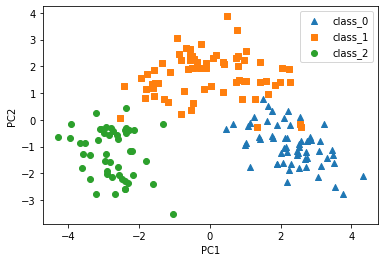

In [81]:
markers = ['^','s','o']     # class 0-세모 , class 2-네모, class 3-동그라미

for i, marker in enumerate(markers):
    x_axis_data = df[df.target == i]['PC1']
    y_axis_data = df[df.target == i]['PC2']
    plt.scatter(x_axis_data, y_axis_data, marker = marker, 
                label=wine.target_names[i])
plt.legend()
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.show()

In [82]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()